In [11]:
# Librerías
import os                             # Manejo de archivos y directorios
import pandas as pd                   # Manipulación de datos
import numpy as np                    # Cálculos numéricos
import matplotlib.pyplot as plt       # Visualización de datos
import seaborn as sns                 # Visualización de datos

In [2]:
# Lectura del archivo de entrenamiento (train)
df = pd.read_csv('spam_train.csv')
print ("El tamaño del dataset es: ", df.shape)
df.info()

El tamaño del dataset es:  (3001, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3001 non-null   int64  
 1   V1      3001 non-null   float64
 2   V2      3001 non-null   float64
 3   V3      3001 non-null   float64
 4   V4      3001 non-null   float64
 5   V5      3001 non-null   float64
 6   V6      3001 non-null   float64
 7   V7      3001 non-null   float64
 8   V8      3001 non-null   float64
 9   V9      3001 non-null   float64
 10  V10     3001 non-null   float64
 11  V11     3001 non-null   float64
 12  V12     3001 non-null   float64
 13  V13     3001 non-null   float64
 14  V14     3001 non-null   float64
 15  V15     3001 non-null   float64
 16  V16     3001 non-null   float64
 17  V17     3001 non-null   float64
 18  V18     3001 non-null   float64
 19  V19     3001 non-null   float64
 20  V20     3001 non-null   float64
 21 

In [3]:
print("La variable objetivo cuenta con:" + str(df["V58"].unique()) + "valores únicos.")

# Aislamiento de variables predictoras y objetivo
X = df.drop(columns=["ID", "V58"])
y = df["V58"]

La variable objetivo cuenta con:[1 0]valores únicos.


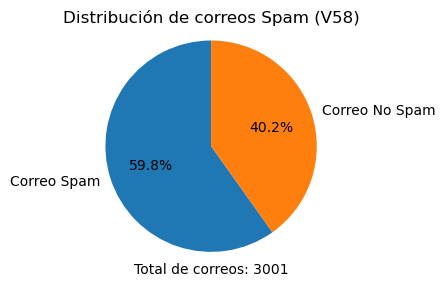

In [4]:
#  Distribución de la variable objetivo
counts = df['V58'].value_counts(dropna=False)
total = counts.sum()

# Gráfica circular
labels = ["Correo Spam", "Correo No Spam"]
plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)

# Diseño gráfico
plt.title("Distribución de correos Spam (V58)")
plt.text(0, -1.2,f"Total de correos: {total}",ha="center",fontsize=10)
plt.axis("equal")
plt.show()

In [5]:
# Estadística descriptiva de las variables numéricas
X.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,3001.0,0.098570,0.339230,0.000,0.000,0.000,0.000,6.060
V2,3001.0,0.216348,1.300497,0.000,0.000,0.000,0.000,14.280
V3,3001.0,0.280920,0.497393,0.000,0.000,0.000,0.430,5.100
V4,3001.0,0.088704,1.700779,0.000,0.000,0.000,0.000,42.810
V5,3001.0,0.322706,0.706823,0.000,0.000,0.000,0.400,10.000
V6,3001.0,0.150202,0.272827,0.000,0.000,0.054,0.192,3.609
V7,3001.0,0.112929,0.377867,0.000,0.000,0.000,0.000,7.270
V8,3001.0,0.111876,0.323354,0.000,0.000,0.000,0.000,4.340
V9,3001.0,0.161871,0.556893,0.036,0.036,0.036,0.036,9.126
V10,3001.0,0.251036,0.698606,0.000,0.000,0.000,0.170,18.180


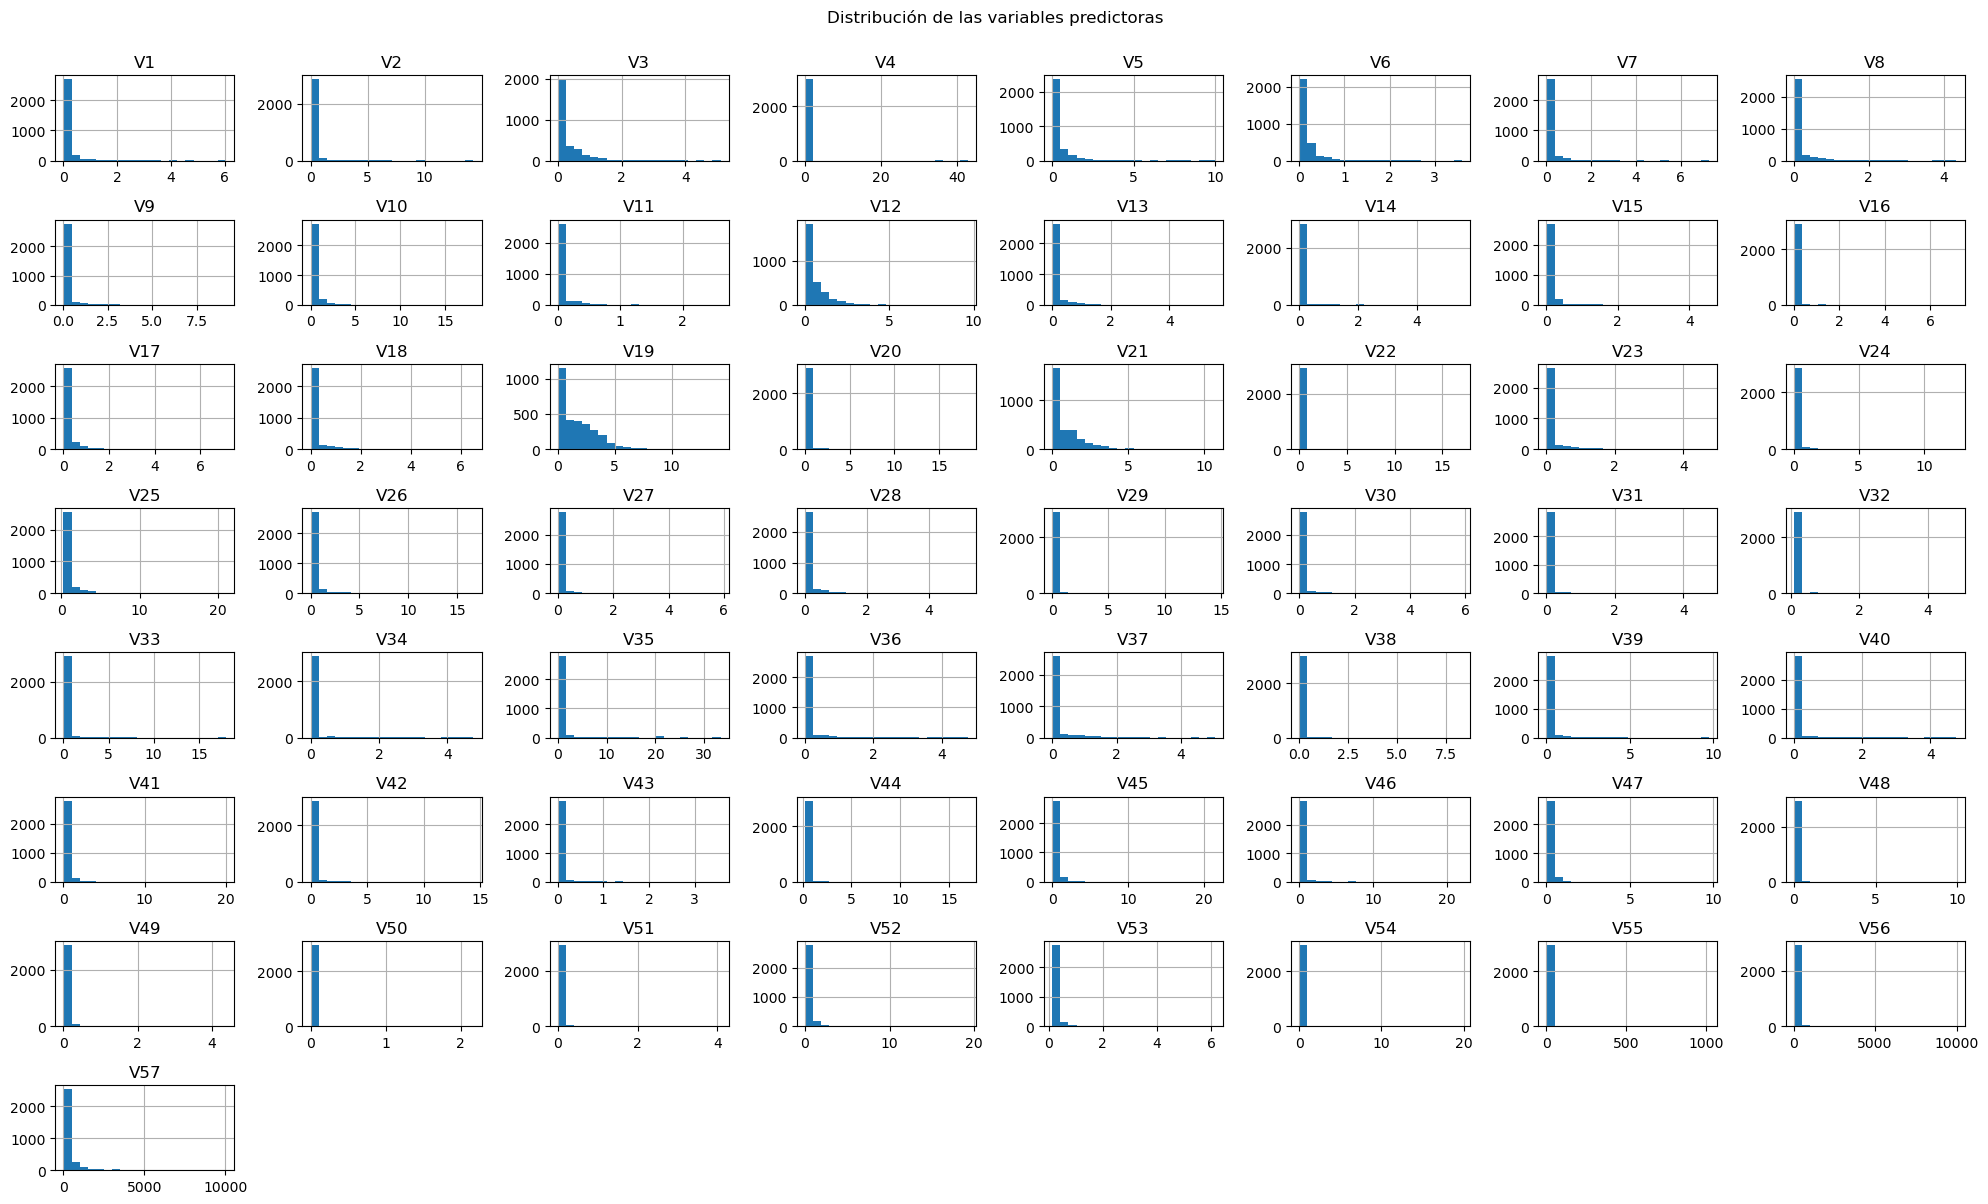

In [6]:
# Análisis de la distribución de las variables predictoras
X.hist(figsize=(20,12), bins=20)
plt.suptitle("Distribución de las variables predictoras", y=1.0)
plt.tight_layout()
plt.show()

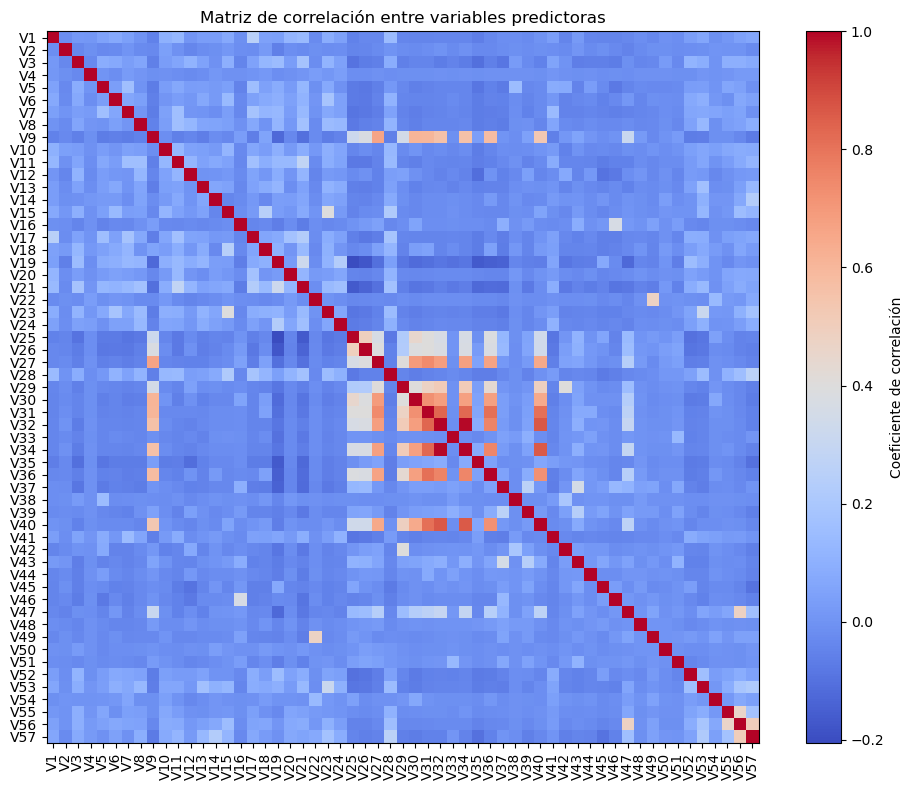

In [ ]:
# Matirz de correlación variables predictoras
corr = X.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Coeficiente de correlación")

# Etiquetas
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Título
plt.title("Matriz de correlación entre variables predictoras")
plt.tight_layout()
plt.show()

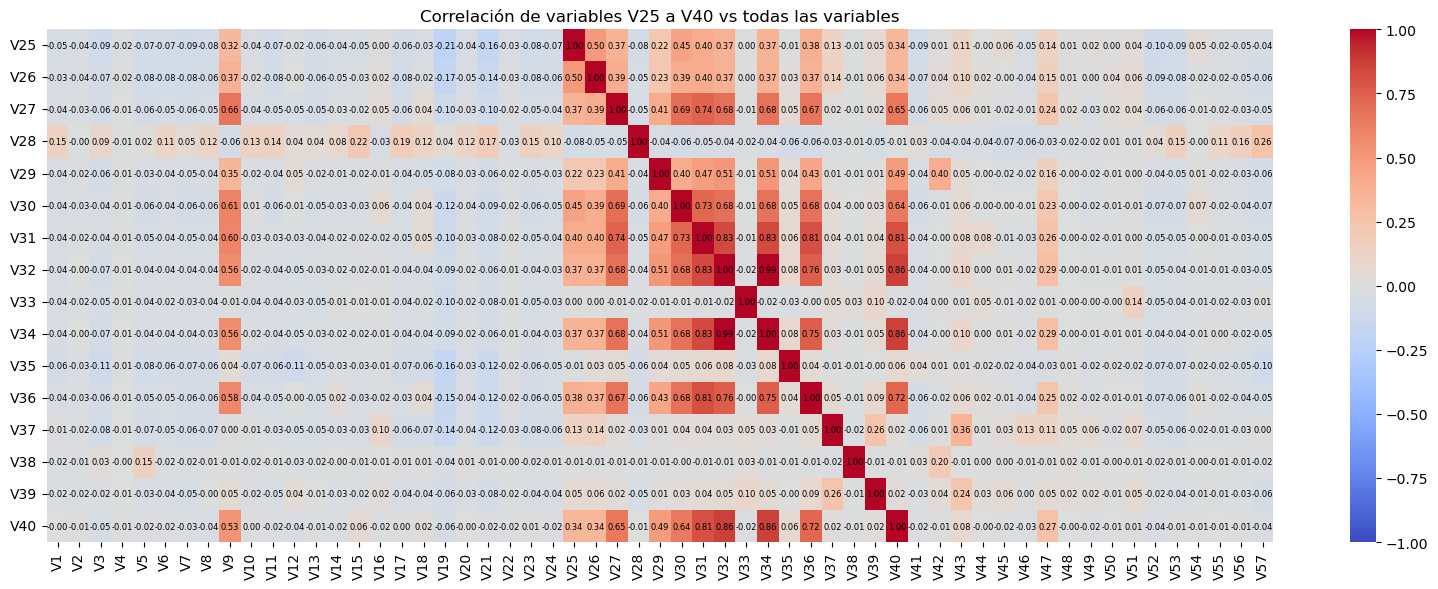

In [26]:
# Variables 25 a 40 (posición 24 a 39 porque Python inicia en 0)
subset = corr.iloc[24:40, :]

plt.figure(figsize=(16, 6))

ax = sns.heatmap(
    subset,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=False
)

# Iterar correctamente: filas y columnas reales
for i in range(subset.shape[0]):        # filas
    for j in range(subset.shape[1]):    # columnas
        ax.text(
            j + 0.5, 
            i + 0.5, 
            f"{subset.iloc[i, j]:.2f}",
            ha="center", 
            va="center", 
            fontsize=6,
            color="black"
        )

plt.title("Correlación de variables V25 a V40 vs todas las variables")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Modelamiento de los datos

In [27]:
# Adición de librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
def build_model(activation="relu", n_hidden=1, n_neurons=32):
    
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    for _ in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation=activation))
    
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    return model


In [ ]:
activations = ["relu", "tanh", "sigmoid"]
hidden_layers = [1, 2]
neurons = [32, 64]

In [30]:
results = []

for act in activations:
    for hl in hidden_layers:
        for neu in neurons:
            
            model = build_model(
                activation=act,
                n_hidden=hl,
                n_neurons=neu
            )
            
            history = model.fit(
                X_train, y_train,
                epochs=30,
                batch_size=32,
                verbose=0,
                validation_split=0.2
            )
            
            loss, acc = model.evaluate(X_test, y_test, verbose=0)
            
            results.append({
                "Activation": act,
                "Hidden Layers": hl,
                "Neurons": neu,
                "Test Accuracy": acc
            })

results_df = pd.DataFrame(results)
results_df.sort_values("Test Accuracy", ascending=False)


,Activation,Hidden Layers,Neurons,Test Accuracy
7,tanh,2,64,0.938957
2,relu,2,32,0.932297
5,tanh,1,64,0.932297
1,relu,1,64,0.931188
0,relu,1,32,0.930078
3,relu,2,64,0.930078
6,tanh,2,32,0.930078
11,sigmoid,2,64,0.930078
4,tanh,1,32,0.928968
8,sigmoid,1,32,0.924528


In [35]:
# Datos de test
test_df = pd.read_csv("spam_test.csv")
sample_sub = pd.read_csv("sample_submission.csv")  # (opcional, para validar estructura)

X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

X_kaggle_scaled = scaler.transform(X_kaggle)

# Predicciones
proba = model.predict(X_kaggle_scaled, verbose=0).ravel()
pred_label = (proba >= 0.5).astype(int)

# Crear sarchivo de salida
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Guardar archivo final
submission.to_csv("submission.csv", index=False)
submission.head()

,ID,Label
0,1147,0
1,2299,0
2,2839,1
3,52,1
4,4507,0


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# -------------------------------------------------------
# 1) Split + Escalado
# -------------------------------------------------------
# Asegura y binaria 0/1
y = y.astype(int).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# -------------------------------------------------------
# 2) Builder flexible (BatchNorm + Dropout + L2)
# -------------------------------------------------------
def build_model(
    input_dim,
    activation="tanh",
    hidden_layers=2,
    neurons=64,
    dropout=0.3,
    l2=1e-4,
    learning_rate=1e-3,
    batch_norm=True
):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    for _ in range(hidden_layers):
        model.add(layers.Dense(
            neurons,
            activation=None if batch_norm else activation,
            kernel_regularizer=regularizers.l2(l2)
        ))
        if batch_norm:
            model.add(layers.BatchNormalization())
            model.add(layers.Activation(activation))
        model.add(layers.Dropout(dropout))

    model.add(layers.Dense(1, activation="sigmoid"))

    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=[
            keras.metrics.BinaryAccuracy(name="acc"),
            keras.metrics.AUC(name="auc")
        ]
    )
    return model

# -------------------------------------------------------
# 3) 3 modelos recomendados (variando hiperparámetros)
# -------------------------------------------------------
configs = [
    # Modelo 1 (ganador tanh 2x64) -> potenciar con BN+Dropout+L2 + LR un poco menor
    dict(name="tanh_2x64_bn_do_l2_lr",
         activation="tanh", hidden_layers=2, neurons=64,
         dropout=0.30, l2=1e-4, learning_rate=7e-4, batch_norm=True),

    # Modelo 2 (relu 2x32) -> probar más capacidad y estabilidad
    dict(name="relu_2x128_bn_do_l2_lr",
         activation="relu", hidden_layers=2, neurons=128,
         dropout=0.35, l2=1e-4, learning_rate=1e-3, batch_norm=True),

    # Modelo 3 (tanh 1x64) -> simple pero fuerte, aumentar capacidad + regularización
    dict(name="tanh_1x256_bn_do_l2_lr",
         activation="tanh", hidden_layers=1, neurons=256,
         dropout=0.40, l2=3e-4, learning_rate=8e-4, batch_norm=True),
]

# -------------------------------------------------------
# 4) Callbacks (EarlyStopping + ReduceLROnPlateau)
# -------------------------------------------------------
def get_callbacks():
    return [
        keras.callbacks.EarlyStopping(
            monitor="val_auc",
            mode="max",
            patience=10,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_auc",
            mode="max",
            factor=0.5,
            patience=4,
            min_lr=1e-6,
            verbose=1
        )
    ]

# -------------------------------------------------------
# 5) Entrenamiento + evaluación comparativa
# -------------------------------------------------------
results = []
trained_models = {}

for cfg in configs:
    tf.keras.backend.clear_session()
    model = build_model(input_dim=X_train_s.shape[1], **{k:v for k,v in cfg.items() if k!="name"})
    history = model.fit(
        X_train_s, y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=32,
        verbose=0,
        callbacks=get_callbacks()
    )

    # Predicciones probabilidad
    proba_test = model.predict(X_test_s, verbose=0).ravel()
    pred_test  = (proba_test >= 0.5).astype(int)

    test_acc = accuracy_score(y_test, pred_test)
    test_auc = roc_auc_score(y_test, proba_test)

    best_val_auc = np.max(history.history["val_auc"])
    best_val_acc = np.max(history.history["val_acc"])

    results.append({
        "Model": cfg["name"],
        "Activation": cfg["activation"],
        "Hidden Layers": cfg["hidden_layers"],
        "Neurons": cfg["neurons"],
        "Dropout": cfg["dropout"],
        "L2": cfg["l2"],
        "LR": cfg["learning_rate"],
        "Best Val AUC": best_val_auc,
        "Best Val Acc": best_val_acc,
        "Test AUC": test_auc,
        "Test Acc": test_acc
    })

    trained_models[cfg["name"]] = model

results_df = pd.DataFrame(results).sort_values(["Test AUC","Test Acc"], ascending=False)
results_df



Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00039999998989515007.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.00019999999494757503.

Epoch 28: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.


,Model,Activation,Hidden Layers,Neurons,Dropout,L2,LR,Best Val AUC,Best Val Acc,Test AUC,Test Acc
2,tanh_1x256_bn_do_l2_lr,tanh,1,256,0.40,0.0003,0.0008,0.976031,0.929167,0.979818,0.923461
0,tanh_2x64_bn_do_l2_lr,tanh,2,64,0.30,0.0001,0.0007,0.976977,0.925000,0.979011,0.928453
1,relu_2x128_bn_do_l2_lr,relu,2,128,0.35,0.0001,0.0010,0.975506,0.941667,0.975184,0.940100


In [37]:
best_name = results_df.iloc[0]["Model"]
best_model = trained_models[best_name]
print("Mejor modelo:", best_name)
results_df.head(3)

Mejor modelo: tanh_1x256_bn_do_l2_lr


,Model,Activation,Hidden Layers,Neurons,Dropout,L2,LR,Best Val AUC,Best Val Acc,Test AUC,Test Acc
2,tanh_1x256_bn_do_l2_lr,tanh,1,256,0.40,0.0003,0.0008,0.976031,0.929167,0.979818,0.923461
0,tanh_2x64_bn_do_l2_lr,tanh,2,64,0.30,0.0001,0.0007,0.976977,0.925000,0.979011,0.928453
1,relu_2x128_bn_do_l2_lr,relu,2,128,0.35,0.0001,0.0010,0.975506,0.941667,0.975184,0.940100


In [38]:
# Carga de datos de test
test_df = pd.read_csv("spam_test.csv")

# Preparar variables
X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

# Escalar con el MISMO scaler de entrenamiento
X_kaggle_scaled = scaler.transform(X_kaggle)
# Predicción
proba = best_model.predict(X_kaggle_scaled, verbose=0).ravel()

# Convertir a clase (umbral 0.5)
pred_label = (proba >= 0.5).astype(int)

# Crear archivo submission
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Exportar archivo
submission.to_csv("submission.csv", index=False)

print("Archivo submission.csv generado correctamente")
submission.head()

Archivo submission.csv generado correctamente


,ID,Label
0,1147,0
1,2299,0
2,2839,1
3,52,1
4,4507,0
